# Seminar 3 - Numerical Issues

> To be updated

The unit so far has introduced how algorithms can be implemented in a programming language to solve mathematical problems.

Generally, if you use a computer algoruthm to solve a problem, instead of working something out by analysis, we call it a **numerical method**.

> Example: find the a root of $ax^2 + bx + c = 0$.  An analytical method would be the known formula $x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$.  A numerical method would be to run a bisection search.

This seminar will cover some of the limitations of using a computer to do maths.  We often refer to these as **numerical issues**.  In particular, this seminar will explore three "gotchas":
 - Truncation
 - Conditioning
 - Time stepping




## Truncation

Let's begin with an example.  Think of a number...

In [2]:
a = 1e-12

Now add one million to that number...

In [113]:
b = a + 1000000

Take away one million...

In [114]:
c = b - 1000000

And you should be back where you started, right?

In [116]:
print('a was',a)
print('b was',b)
print('c is',c)

a was 1e-12
b was 1000000.0
c is 0.0


Where did my 1e-12 go?  It was important to someone...

To understand, recall how floating point numbers are stored

#### Floating point binary numbers

Binary **floating point** number storage is similar to *scientific notation* for decimal (base-10) values, but with:
- a *binary* **mantissa** (normalised so that a maximum of 1 significant figure (s.f.) is to the left of the decimal point) 
- a *binary* **exponent** (whole number, no decimal point)
- a **base** of 2


$
\boxed{\underbrace{M}_{mantissa} \times \underbrace{2}_{base}\overbrace{^E}^{exponent}}
$


- $
1.25 = 1\frac{1}{4} \times 2^0 
\textrm{ written as 4-bit mantissa }    \boxed{ \underbrace{1}_{1}.\underbrace{0}_{\frac{1}{2}}\underbrace{1}_{\frac{1}{4}}\underbrace{0}_{\frac{1}{8}} } 
\textrm{ and 2-bit exponent }   \boxed{ \underbrace{0}_{2}\underbrace{0}_{1} }
$
- $
5.5 = 1\frac{3}{8} \times 2^2 
\textrm{ written as 4-bit mantissa }    \boxed{ \underbrace{1}_{1}.\underbrace{0}_{\frac{1}{2}}\underbrace{1}_{\frac{1}{4}}\underbrace{1}_{\frac{1}{8}} } 
\textrm{ and 2-bit exponent }   \boxed{ \underbrace{1}_{2}\underbrace{0}_{1} }
$
- $
12 = 1\frac{1}{2} \times 2^3 
\textrm{ written as 4-bit mantissa }    \boxed{ \underbrace{1}_{1}.\underbrace{1}_{\frac{1}{2}}\underbrace{0}_{\frac{1}{4}}\underbrace{0}_{\frac{1}{8}} } 
\textrm{ and 2-bit exponent }   \boxed{ \underbrace{1}_{2}\underbrace{1}_{1} }
$

### Floating point arithmetic

To add two numbers, we need to begin by "lining up the digits" _i.e._ moving them to a shared exponent.  For example, using decimal scientific notation, imagine trying to add $1E3$ to $1E-3$.

$(1 \times 10^3) + (1 \times 10^{-3}) = (1 \times 10^3) + (0.000001 \times 10^{3}) = (1 + 0.000001) \times 10^3 = 1.000001\times10^3$

The catch comes at the stage of transforming to $0.000001 \times 10^3$.  If there aren't enough digits on my calculator to write that, the 1 will get chopped off the end - _truncated_ - and the sum gives the result 1.

Something similar, but in binary form, is happening in the computer.  The processor has to move them to a comment exponent to do the add, and then the smaller number gets truncated beyond the last available _bit_.

> **Gotcha #1**: even though the computer can represent small numbers (1E-12) and big numbers (1E6) in memory, it may still struggle to combine them.

Another example, this time multiplying.

$\frac{5}{9}$ is the same as $\frac{1}{3} \times 5 \times \frac{1}{3}$, right?

In [120]:
p = 5/9
q = (1/3)*5*(1/3)
print('p is', p)
print('q is', q)
print(p == q)

p is 0.5555555555555556
q is 0.5555555555555555
False


Wrong!  At least in a computer setting...

Why? Harder to explain, but the order of calculation will hit slightly different truncation errors, so the final results will be slightly different.

General rule: never use exact comparison with floating point numbers.  One of the in-class examples looked at checking if two numbers are close, and Python even provides a function for this in the `math` library.

In [121]:
from math import isclose
print(isclose(p,q))

True


## Conditioning

In [5]:
import numpy as np

In [ ]:
def q(x):
    return 2 + 3*x + 4*x*x

In [ ]:
x1 = 0
y1 = q(x1)
x2 = 0.5 #*1e-12
y2 = q(x2)
x3 = 1
y3 = q(x3)

In [98]:
M = np.array([[1,x1,x1**2],
              [1,x2,x2**2],
              [1,x3,x3**2]])
v = np.array([y1,y2,y3])
p = np.linalg.inv(M)@v
p

array([2., 3., 4.])

In [ ]:
x4 = 0.25
print(q(x4),p[0] + p[1]*x4 + p[2]*x4**2)


3.0 3.0


In [100]:
np.linalg.cond(M)

np.float64(15.099657722502098)

## Time stepping

In [122]:
x = 1
v = 0
k = 1
dt = 0.01
xs = []

In [123]:
for ii in range(1000):
    xdot = v
    vdot = -k*x
    x = x + dt*xdot
    v = v + dt*vdot
    print(x,v)
    xs.append(x)

1.0 -0.01
0.9999 -0.02
0.9997 -0.029999
0.99940001 -0.039996000000000004
0.99900005 -0.0499900001
0.998500149999 -0.0599800006
0.997900349993 -0.06996500209999
0.9972006999720001 -0.07994400559992
0.9964012599160009 -0.08991601259964001
0.9955020997900045 -0.09988002519880002
0.9945032995380165 -0.10983504619670006
0.9934049490760495 -0.11978007919208022
0.9922071482841287 -0.1297141286828407
0.9909100069973003 -0.139636200165682
0.9895136449956434 -0.14954530023565502
0.9880181919932869 -0.15944043668561145
0.9864237876264308 -0.16932061860554432
0.9847305814403754 -0.17918485648180862
0.9829387328755573 -0.1890321622962124
0.9810484112525952 -0.19886154962496796
0.9790597957563455 -0.2086720337374939
0.9769730754189706 -0.21846263169505736
0.97478844910202 -0.22823236244924708
0.9725061254775276 -0.2379802469402673
0.9701263230081248 -0.24770530819504255
0.9676492699261744 -0.2574065714251238
0.9650752042119232 -0.26708306412438554
0.9624043735706793 -0.2767338161665048
0.95963703540

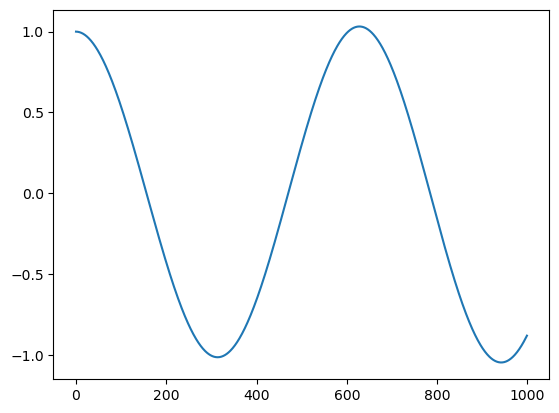

In [102]:
import matplotlib.pyplot as plt
plt.plot(xs)
plt.show()

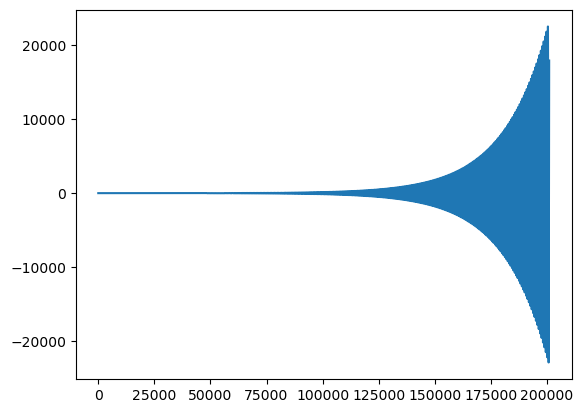

In [125]:
for ii in range(100000):
    xdot = v
    vdot = -k*x
    x = x + dt*xdot
    v = v + dt*vdot
    xs.append(x)

plt.plot(xs)
plt.show()